# Image Classification Using Supervised

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
''' Run only once
Categories=['COVID19','NORMAL']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='datasets/Data/train' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data '''

loading... category : COVID19
loaded category:COVID19 successfully
loading... category : NORMAL
loaded category:NORMAL successfully


In [4]:
#df.to_csv("image_data.csv")

In [2]:
df = pd.read_csv("image_data.csv")

In [4]:
del df['Unnamed: 0']

In [5]:
Categories=['COVID19','NORMAL']
target_arr=[] 
datadir='datasets/Data/train' 
for i in Categories:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        target_arr.append(Categories.index(i))
target=np.array(target_arr)
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [6]:
x

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.764075,0.731634,0.731634,0.731634,0.687226,0.687226,0.687226,0.607163,0.607163,0.607163
1,0.330588,0.330588,0.330588,0.330588,0.330588,0.330588,0.326667,0.326667,0.326667,0.339974,...,0.337438,0.284235,0.284235,0.284235,0.213987,0.213987,0.213987,0.142196,0.142196,0.142196
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.360834,0.307434,0.307434,0.307434,0.286771,0.286771,0.286771,0.561069,0.561069,0.561069
3,0.028131,0.028131,0.028131,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,...,0.043137,0.043137,0.043137,0.043137,0.043137,0.043137,0.043137,0.043137,0.043137,0.043137
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.039216,0.043137,0.043137,0.043137,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1807,0.003922,0.003922,0.003922,0.025333,0.025333,0.025333,0.058824,0.058824,0.058824,0.097586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1808,0.000000,0.000000,0.000000,0.013647,0.013647,0.013647,0.054902,0.054902,0.054902,0.058824,...,0.053294,0.039477,0.039477,0.039477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1809,0.117072,0.117072,0.117072,0.166902,0.166902,0.166902,0.208889,0.208889,0.208889,0.239737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1806    1
1807    1
1808    1
1809    1
1810    1
Name: Target, Length: 1811, dtype: int32

# SVM

In [14]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [18]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1]
The actual data is:
[1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 

Enter URL of Image :test_data/covid1.jpg


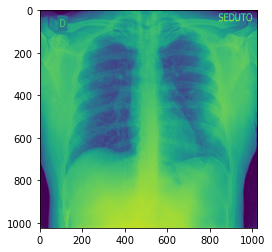

COVID19 = 99.78420606730039%
NORMAL = 0.21579393269960112%
The predicted image is : COVID19


In [19]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

Enter URL of Image :test_data/normal1.jpg


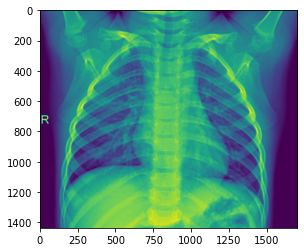

COVID19 = 0.00106578288634568%
NORMAL = 99.99893421711366%
The predicted image is : NORMAL


In [20]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

# KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
hyperparameters = {'n_neighbors': [1, 2, 4, 5, 7, 8, 9, 10, 15, 25],
                   'p': [1, 2],
                   'weights': ['uniform', 'distance']}
clf_knn = GridSearchCV(knn, hyperparameters, cv=5, verbose=0) # finding optimal hyperparamter

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
clf_knn.fit(x_train,y_train)
print('The KNN Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The KNN Model is trained well with the given images


In [11]:
y_pred = clf_knn.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1]
The actual data is:
[1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 

Enter URL of Image : test_data/covid1.jpg


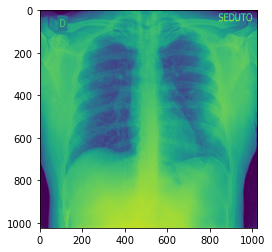

COVID19 = 100.0%
NORMAL = 0.0%
The predicted image is : COVID19


In [14]:
url=input('Enter URL of Image : ')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=clf_knn.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[clf_knn.predict(l)[0]])

Enter URL of Image :test_data/normal1.jpg


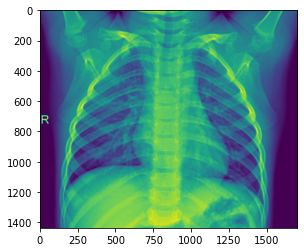

COVID19 = 0.0%
NORMAL = 100.0%
The predicted image is : NORMAL


In [15]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=clf_knn.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[clf_knn.predict(l)[0]])

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
hyperparameters = {'criterion':['gini', 'entropy'],
                   'max_depth': [2, 3, 4, 5, 6, 7, 10],
                   'min_samples_split':[3, 4, 5, 6, 7]}
clf_dt = GridSearchCV(dt, hyperparameters, cv=5, verbose=0) # finding optimal hyperparamter

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
clf_dt.fit(x_train,y_train)
print('The Decision Tree Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Decision Tree Model is trained well with the given images


In [18]:
y_pred = clf_dt.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1]
The actual data is:
[1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 

Enter URL of Image :test_data/covid1.jpg


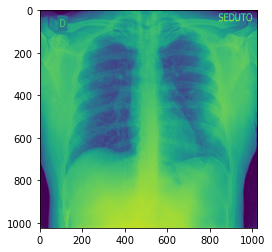

COVID19 = 100.0%
NORMAL = 0.0%
The predicted image is : COVID19


In [19]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=clf_dt.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[clf_dt.predict(l)[0]])

Enter URL of Image :test_data/normal1.jpg


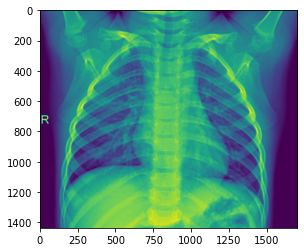

COVID19 = 0.0%
NORMAL = 100.0%
The predicted image is : NORMAL


In [21]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=clf_dt.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[clf_dt.predict(l)[0]])